In [2]:
%load_ext autoreload
%autoreload 2

# load embeddings
from data.embeddings import load_saved_embeddings

train_embeddings = load_saved_embeddings(
    dataset="toxigen",
    model="deberta-large",
    seed=42,
    split="train",
    pooler="mean_with_attention",
    layer=24
)

eval_embeddings = load_saved_embeddings(
    dataset="toxigen",
    model="deberta-large",
    seed=42,
    split="eval",
    pooler="mean_with_attention",
    layer=24
)

test_embeddings = load_saved_embeddings(
    dataset="toxigen",
    model="deberta-large",
    seed=42,
    split="test",
    pooler="mean_with_attention",
    layer=24
)

# load classifier 
from data.models import load_saved_wrapperbox_model


knn_clf = load_saved_wrapperbox_model(
    dataset="toxigen",
    model="deberta-large",
    seed=42,
    pooler="mean_with_attention",
    wrapperbox="KNN"
)

svm_clf = load_saved_wrapperbox_model(
    dataset="toxigen",
    model="deberta-large",
    seed=42,
    pooler="mean_with_attention",
    wrapperbox="SVM",
)

lmeans_clf = load_saved_wrapperbox_model(
    dataset="toxigen",
    model="deberta-large",
    seed=42,
    pooler="mean_with_attention",
    wrapperbox="L_Means",
)

# load labels 
from data.datasets import load_dataset_from_hf, load_labels_at_split
import numpy as np
dataset = load_dataset_from_hf(dataset="toxigen")
train_labels = load_labels_at_split(dataset, "train")
eval_labels = load_labels_at_split(dataset, "eval")
train_eval_embeddings = np.vstack([train_embeddings, eval_embeddings])
train_eval_labels = np.concatenate([train_labels, eval_labels])
test_labels = load_labels_at_split(dataset, "test")


Token has not been saved to git credential helper. Pass `add_to_git_credential=True` if you want to set the git credential as well.
Token is valid (permission: read).
Your token has been saved to /home/samsoup/.cache/huggingface/token
Login successful


In [14]:
from utils.constants.directory import RESULTS_DIR
import json
import numpy as np
import matplotlib.pyplot as plt

def visualize(wrapper_name: str, filter_val: int = np.Infinity):
    data_path = RESULTS_DIR / "MinimalSubset" \
        / f"toxigen_deberta_large_{wrapper_name}_minimal_subsets.json"

    # Read the JSON file
    with open(data_path, 'r') as f:
        data = json.load(f)

    minimal_subset_sizes = []
    for example in data:
        # Extract the minimum_subset array for each example
        minimum_subset = example.get('minimum_subset', [])
        
        # Compute the size of the minimal subset for each example
        minimal_subset_size = len(minimum_subset)
        
        if minimal_subset_size != 0 and minimal_subset_size < filter_val:
            minimal_subset_sizes.append(minimal_subset_size)

    print(minimal_subset_sizes)
    total_subsets = len(minimal_subset_sizes)

    bins = 100
    plt.figure(figsize=(10, 6))
    plt.hist(minimal_subset_sizes, bins=bins, color='skyblue', edgecolor='black')
    tick_locs = np.arange(0, max(minimal_subset_sizes), 100)
    plt.xticks(tick_locs, rotation='vertical')
    plt.xlabel('Size of Minimal Set')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Size of Minimal Sets for Toxigen {wrapper_name}')
    plt.text(
        max(minimal_subset_sizes), max(plt.hist(minimal_subset_sizes, bins=bins, color='skyblue', edgecolor='black')[0]), 
        f'{total_subsets}/{len(test_labels)}', 
        horizontalalignment='right', verticalalignment='top'
    )

    # Calculate the median and plot as a line
    median_value = np.median(np.array(total_subsets))
    plt.axvline(median_value, color='red', linestyle='--', linewidth=2, label='Median')
    # Label the median line with a piece of text
    text_height = max(plt.hist(minimal_subset_sizes, bins=bins, color='skyblue', edgecolor='black')[0]) * 0.8
    plt.text(median_value * 1.1, text_height, f'Median: {median_value}', color='red', fontsize=12)
    plt.show()

[5844, 6299, 6400, 6585, 1187, 6093, 188, 934, 6431, 6351, 6204, 1, 10, 6398, 6484, 153, 49, 6377, 6509, 6368, 6318, 188, 6090, 1, 6390, 936, 951, 23, 6309, 6067, 6401, 1025, 5738, 35, 6240, 6186, 6416, 1516, 6220, 6164, 6487, 6519, 6181, 6446, 105, 6335, 538, 1662, 6268, 5, 854, 126, 5443, 6377, 6519, 6359, 672, 6092, 6438, 2, 1085, 7, 487, 701, 8, 365, 7, 6480, 6257, 440, 6353, 6353, 6411, 1034, 6172, 6549, 6250, 33, 9, 24, 6001, 6043, 6247, 6301, 5893, 6225, 6442, 6395, 6362, 6534, 1543, 1, 868, 6479, 6494, 1270, 56, 6243, 6334, 6293, 6222, 6068, 6213, 6554, 3734, 1464, 2, 6138, 1262, 1, 691, 6342, 6291, 6377, 1222, 1576, 1410, 5, 449, 845, 1268, 6476, 6428, 6453, 6494, 1, 6433, 6288, 6362, 6373, 6170, 1304, 5859, 1068, 6527, 30, 6429, 6472, 1227, 6069, 6572, 6248, 6309, 1526, 6442, 869, 6455, 9, 6233, 6330, 6071, 369, 5, 72, 5892, 6274, 4784, 6579, 5934, 1594, 6291, 6049, 1, 424, 6366, 6347, 6373, 6230, 6395, 38, 6385, 6051, 4, 311, 127, 6169, 6399, 6505, 6537, 6105, 6311, 6475, 60

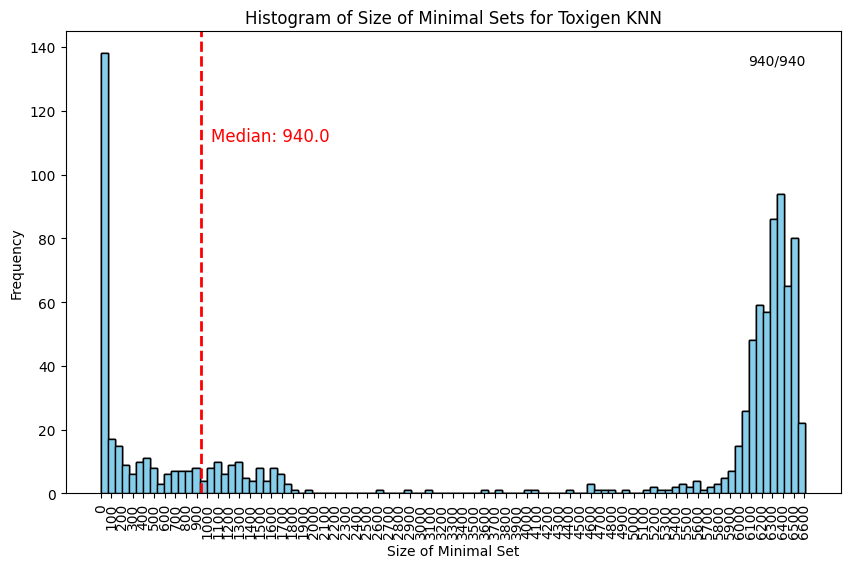

In [17]:
## Visualize KNN subset
visualize(wrapper_name="KNN")

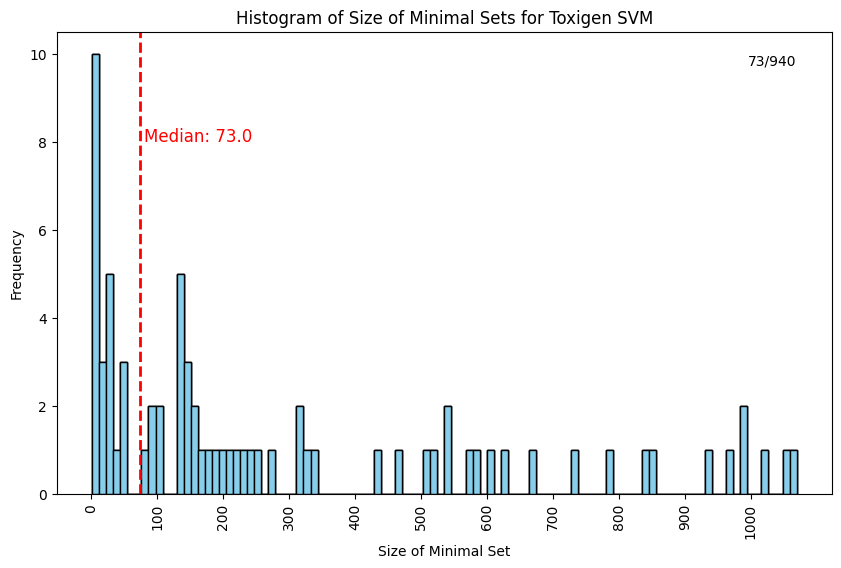

In [10]:
visualize(wrapper_name="SVM")

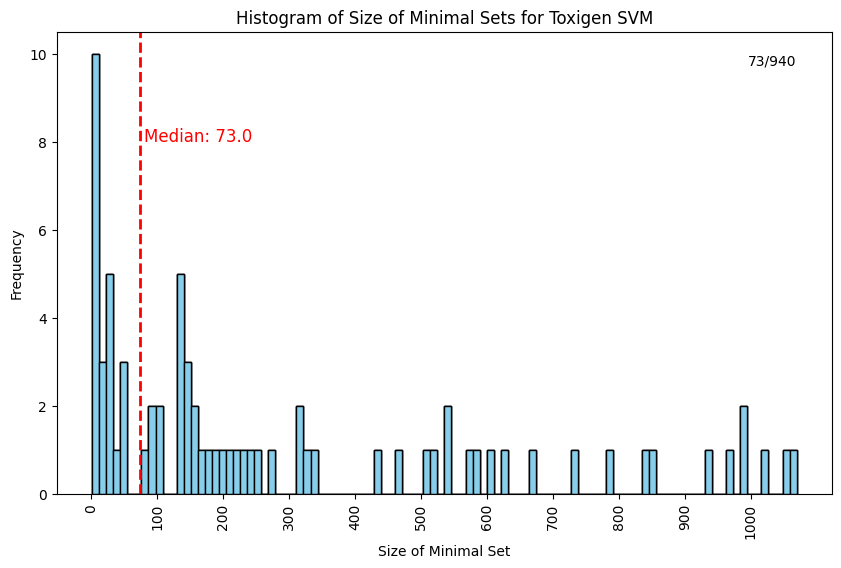

In [8]:
## Visualize SVM subset

from utils.constants.directory import RESULTS_DIR
import json
import numpy as np
import matplotlib.pyplot as plt

svm_data_path = RESULTS_DIR / "MinimalSubset" \
    / "toxigen_deberta_large_SVM_minimal_subsets.json"

# Read the JSON file
with open(svm_data_path, 'r') as f:
    svm_data = json.load(f)

minimal_subset_sizes = []
for example in svm_data:
    # Extract the minimum_subset array for each example
    minimum_subset = example.get('minimum_subset', [])
    
    # Compute the size of the minimal subset for each example
    minimal_subset_size = len(minimum_subset)
    
    if minimal_subset_size != 0:
        minimal_subset_sizes.append(minimal_subset_size)

total_subsets = len(minimal_subset_sizes)
wrapper_name = "SVM"

bins = 100
plt.figure(figsize=(10, 6))
plt.hist(minimal_subset_sizes, bins=bins, color='skyblue', edgecolor='black')
tick_locs = np.arange(0, max(minimal_subset_sizes), 100)
plt.xticks(tick_locs, rotation='vertical')
plt.xlabel('Size of Minimal Set')
plt.ylabel('Frequency')
plt.title(f'Histogram of Size of Minimal Sets for Toxigen {wrapper_name}')
plt.text(
    max(minimal_subset_sizes), max(plt.hist(minimal_subset_sizes, bins=bins, color='skyblue', edgecolor='black')[0]), 
    f'{total_subsets}/{len(test_labels)}', 
    horizontalalignment='right', verticalalignment='top'
)

# Calculate the median and plot as a line
median_value = np.median(np.array(total_subsets))
plt.axvline(median_value, color='red', linestyle='--', linewidth=2, label='Median')
# Label the median line with a piece of text
text_height = max(plt.hist(minimal_subset_sizes, bins=bins, color='skyblue', edgecolor='black')[0]) * 0.8
plt.text(median_value * 1.1, text_height, f'Median: {median_value}', color='red', fontsize=12)
plt.show()
